# Task 1: Exploratory Data Analysis (EDA) and Business Insights

### Importing libaries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Loading the datasets
customers=pd.read_csv("Customers.csv")
product=pd.read_csv("Products.csv")
transaction=pd.read_csv("Transactions.csv")

In [ ]:
#checking the data
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [8]:
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Merging the datasets

In [9]:
data=transaction.merge(customers,on="CustomerID").merge(product,on="ProductID")

In [10]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [12]:
data.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [15]:
#Checking for null values
data.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [17]:
#Collecting the unique values
print(data["Region"].unique())

['Europe' 'Asia' 'South America' 'North America']


In [18]:
#Collecting the unique values
print(data["Category"].unique())

['Electronics' 'Clothing' 'Books' 'Home Decor']


## 1. Regional Revenue Distribution

In [49]:
# Regions contributing the most to revenue 
revenue_region=data.groupby('Region')['TotalValue'].sum()
print(revenue_region)

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


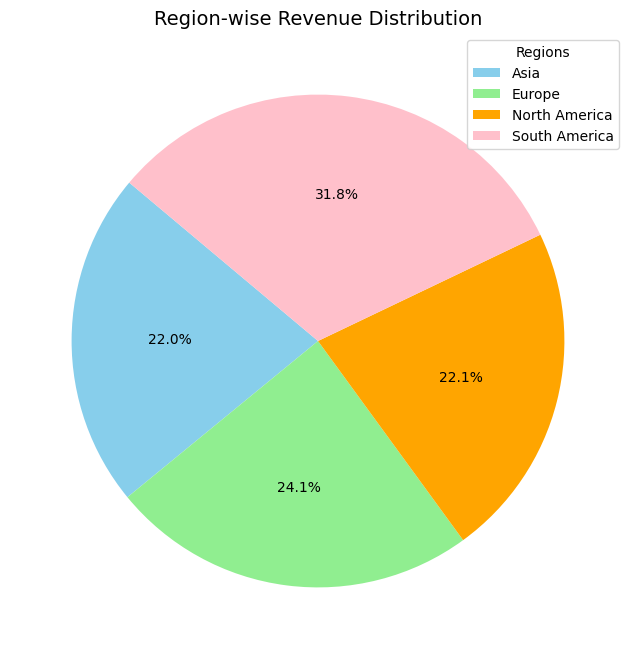

In [61]:
#Define colors for the pie Chart
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'purple']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(revenue_region ,autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Region-wise Revenue Distribution', fontsize=14)
plt.legend(revenue_region.index, title="Regions", loc="upper right", fontsize=10)
plt.show()

## 2. Product Category Performance

In [64]:
# Products Categories driving revenue 
product_performance = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(product_performance)

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


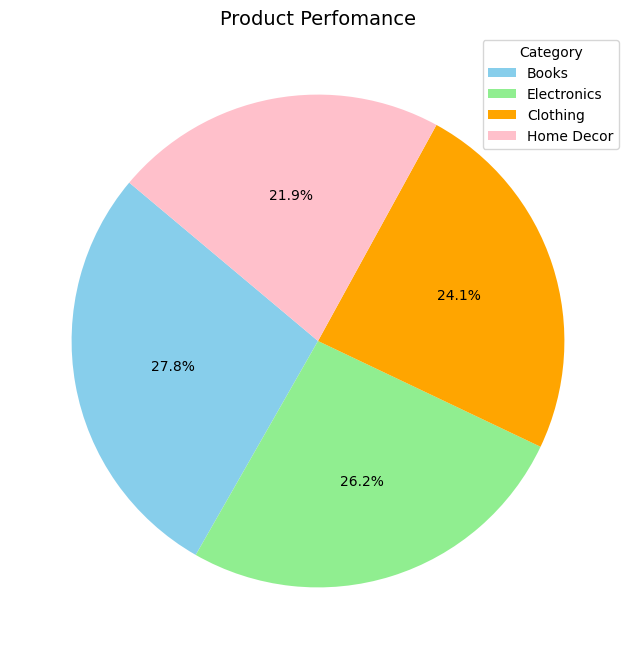

In [74]:
#Define colors for the pie Chart
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'purple']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie( product_performance,autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Product Perfomance', fontsize=14)
plt.legend(product_performance.index, title="Category", loc="upper right", fontsize=10)
plt.show()

## 3. Customer Segmentation (Top 10% customers)

In [69]:
# Top 10% of the customers contributing to the revenue
customer_revenue = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_customer=customer_revenue.head(int(len(customer_revenue)*0.1)) 
print(top_customer)

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
C0087     6604.23
C0104     6579.10
C0175     6210.53
C0041     6149.78
C0102     6132.36
C0096     6072.92
C0143     6044.63
C0045     6021.80
C0013     6000.56
Name: TotalValue, dtype: float64


## 4. Seasonal Trends(Time-Series Analysis) 

In [70]:
#Months with peak sales and transactions 
data['TransactionDate']=pd.to_datetime(data['TransactionDate'])
data['Month']=data['TransactionDate'].dt.to_period('M')
monthly_revenue=data.groupby('Month')['TotalValue'].sum()
print(monthly_revenue)

Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


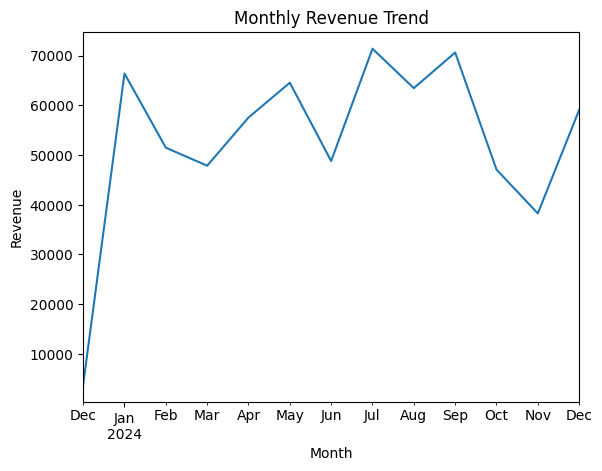

In [71]:
#Plot to show the monthly trends 
monthly_revenue.plot(kind='line',title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

## 5. Best Sellers in Products

In [72]:
#Top 5 Best seller products 
top_products=data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print(top_products.head(5))

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


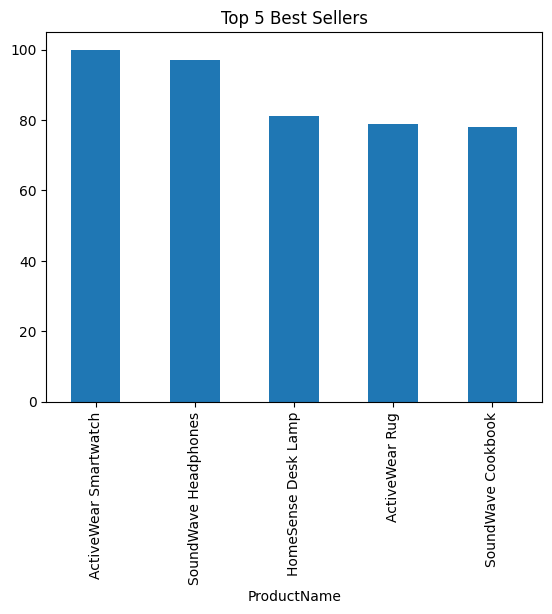

In [73]:
top_products.head(5).plot(kind='bar',title='Top 5 Best Sellers')
plt.show()